In [2]:
# this code is generated by the Domino Code Assist toolbar button
import domino_code_assist as dca
dca.init()

Cannot show ipywidgets in text

## Welcome to a Notebook Running on Domino

This notebook is an example based off of the `iris.py` activity file.

### New to Jupyter Notebooks?
Learn more at https://jupyter.org. The gist is that Jupyter is a web application that allows you to create and share documents that contain _live code, equations, visualizations and explanatory text_.

Uses include:
* data cleaning and transformation
* numerical simulation
* statistical modeling
* machine learning
* reporting 
* and much more.


In [3]:
import os
print("Hello, my name is {}!".format(os.environ['DOMINO_STARTING_USERNAME']))

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

Hello, my name is ross_domino!


In [4]:
# Tell matplotlib to show figures inline
%matplotlib inline

# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from pandas.plotting import scatter_matrix

In [5]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

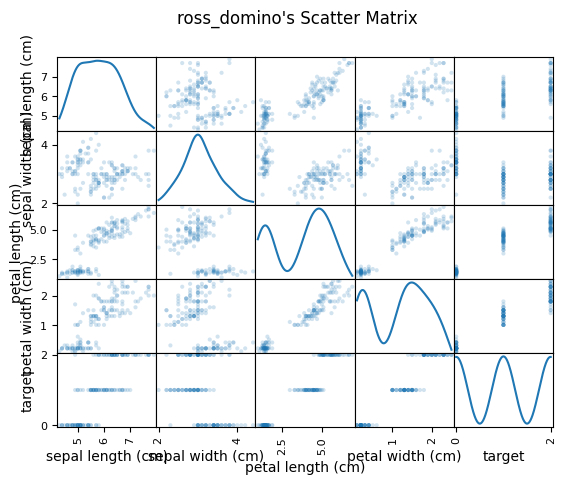

In [10]:
# Plot a Scatter Matrix and save it

%matplotlib inline
import pandas as pd

iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
             columns= iris['feature_names'] + ['target'])

sm = scatter_matrix(iris_df, alpha=0.2, diagonal='kde')
plt.suptitle("{}'s Scatter Matrix".format(os.environ['DOMINO_STARTING_USERNAME']))

# Save the figure
plt.savefig('/mnt/artifacts/results/scatter_matrix.png')

In [52]:
# Set a configuration variable
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

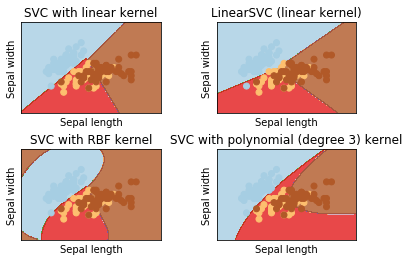

In [53]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
 
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

plt.figure()
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])